In [1]:
# gurobi free license only supports 2000 linear constraints, for higher n a (academic) license is needed
import gurobipy as gp
import numpy as np
from gurobipy import GRB
import matplotlib.pyplot as plt
import string
import seaborn as sns

In [2]:
def createmodel(n: int):
    model = gp.Model('nqueens')
    squares = model.addMVar((n, n, n), vtype=GRB.BINARY, name="x")
    model.setObjective(squares.sum(), GRB.MAXIMIZE)
    model.params.LogToConsole = 0  
    # row/file constraints:
    for i in range(n):
        for j in range(n):
            model.addConstr(squares[i, j, :].sum() <= 1)
            model.addConstr(squares[i, :, j].sum() <= 1)
            model.addConstr(squares[:, i, j].sum() <= 1)
    # diagonal constraints:
    for m in range(n):
        model.addConstrs(gp.quicksum(squares[i, j, m] for i in range(n) for j in range(n) if i - j == k) <= 1 for k in range(-n, n))
        model.addConstrs(gp.quicksum(squares[i, j, m] for i in range(n) for j in range(n) if i + j == k) <= 1 for k in range(2 * n))
        model.addConstrs(gp.quicksum(squares[i, m, j] for i in range(n) for j in range(n) if i - j == k) <= 1 for k in range(-n, n))
        model.addConstrs(gp.quicksum(squares[i, m, j] for i in range(n) for j in range(n) if i + j == k) <= 1 for k in range(2 * n))
        model.addConstrs(gp.quicksum(squares[m, i, j] for i in range(n) for j in range(n) if i - j == k) <= 1 for k in range(-n, n))
        model.addConstrs(gp.quicksum(squares[m, i, j] for i in range(n) for j in range(n) if i + j == k) <= 1 for k in range(2 * n))
    #triagonal constraints:
    model.addConstrs(gp.quicksum(squares[i, j, m] for i in range(n) for j in range(n) for m in range(n) if i - j == k and j-m==l) <= 1 for k in range(-n, n) for l in range(-n,n))
    model.addConstrs(gp.quicksum(squares[i, j, m] for i in range(n) for j in range(n) for m in range(n) if i + j == k and j-m==l) <= 1 for k in range(0, 2*n) for l in range(-n,n))
    model.addConstrs(gp.quicksum(squares[i, j, m] for i in range(n) for j in range(n) for m in range(n) if i + j == k and j+m==l) <= 1 for k in range(0, 2*n) for l in range(0,2*n))
    model.addConstrs(gp.quicksum(squares[i, j, m] for i in range(n) for j in range(n) for m in range(n) if i - j == k and j+m==l) <= 1 for k in range(-n, n) for l in range(0,2*n))
    model.params.PoolSolutions = 10**6
    model.params.PoolGap = 0  
    return(model, squares)

In [3]:
def solve(n: int, model, squares):
    model.params.LogToConsole = 0   
    model.optimize()

In [4]:
def plot(n: int, squares):
    fig, ax = plt.subplots(nrows=n, ncols=1, figsize=(2,2))
    mode = 3 #different plot modes, wip
    
    for d in range(n):
        image = np.zeros(n*n)
        image = image.reshape((n, n))
        row_labels = range(n)
        col_labels = list(string.ascii_uppercase[0:n])
        if n > 26:
            col_labels = range(n)
        for i in range(n):
            for j in range(n):
                if (i+j)%2 == 0:
                    image[i,j] = 0.5
                if mode == 1 and squares.X[i,j,d] == 1:
                    image[i,j] = squares.X[i,j,d]+0.5
                if mode == 2 and squares.X[i,d,j] == 1:
                    image[i,j] = squares.X[i,d,j]+0.5
                if mode == 3 and squares.X[d,i,j] == 1:
                    image[i,j] = squares.X[d,i,j]+0.5
        ax[d] = plt.matshow(image)
        plt.xticks(range(n), col_labels)
        plt.yticks(range(n), row_labels)

    plt.show()

Set parameter Username

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2022-01-20


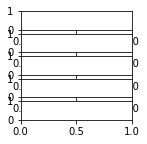

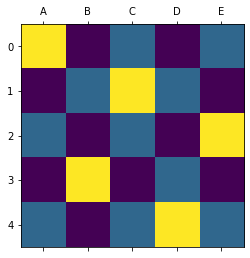

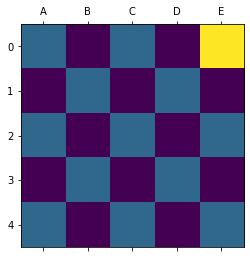

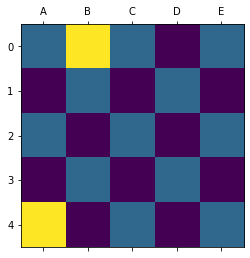

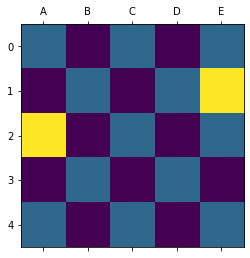

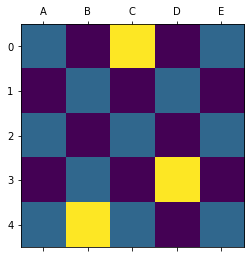

13.0

In [5]:
#example how to run the code
n = 5
model, squares = createmodel(n)
solve(n, model, squares)
plot(n, squares)
model.objVal

Queens placed: 1.0 in 0.0 sec
Queens placed: 1.0 in 0.001003265380859375 sec
Queens placed: 4.0 in 0.002033233642578125 sec
Queens placed: 7.0 in 0.069183349609375 sec
Queens placed: 13.0 in 0.6026020050048828 sec
Queens placed: 21.0 in 41.04021644592285 sec


<AxesSubplot:>

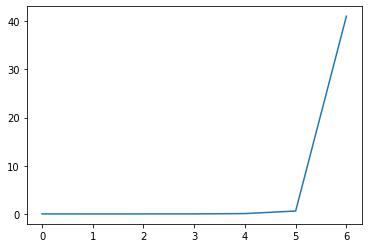

In [10]:
# runs the instances from n=l k and saves the results and runtimes
l = 1 #start
k = 6 #end
runtime = np.zeros((k+1,3))
for i in range(l,k+1):
    model, squares = createmodel(i)
    model.params.LogToConsole = 0
    solve(i, model, squares)
    runtime[i,1] = model.runtime
    runtime[i,2] = model.objVal
    runtime[i,0] = i
    print('Queens placed: '+str(model.objVal)+" in "+str(model.runtime)+" sec")
runtime  
sns.lineplot(y=runtime[:,1], x=runtime[:,0])

<AxesSubplot:>

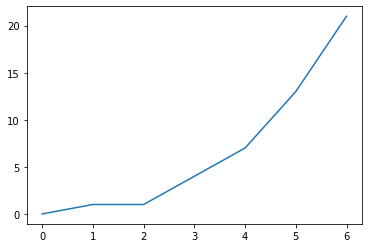

In [11]:
sns.lineplot(y=runtime[:,2], x=runtime[:,0])